In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = ride_df.merge(city_df, on="city")

city_df = city_df.set_index("city")

In [2]:
# Display the data table for preview
print(combined_df.head())
print(combined_df["type"].unique())

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2  Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3  Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4  Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   

   driver_count   type  
0             5  Urban  
1             5  Urban  
2             5  Urban  
3             5  Urban  
4             5  Urban  
['Urban' 'Suburban' 'Rural']


## Bubble Plot of Ride Sharing Data

In [70]:
# Group by city
grouped = combined_df.groupby("city")
total_rides = grouped["type"].count()
average_fare = grouped["fare"].mean()
total_fare = grouped["fare"].sum()


new_df = pd.DataFrame({
    "Total Number of Rides": total_rides,
    "Average Fare": average_fare,
    "Total Fare": total_fare
})

scatter = new_df.merge(city_df, left_index=True, right_index=True)
scatter.head()

,Total Number of Rides,Average Fare,Total Fare,driver_count,type
city,,,,,
Amandaburgh,18,24.641667,443.55,12,Urban
Barajasview,22,25.332273,557.31,26,Urban
Barronchester,16,36.422500,582.76,11,Suburban
Bethanyland,18,32.956111,593.21,22,Suburban
Bradshawfurt,10,40.064000,400.64,7,Rural


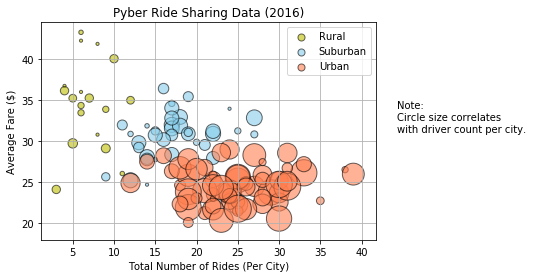

In [142]:
# Obtain the x and y coordinates for each of the three city types
x_rural = scatter.loc[scatter["type"] == "Rural"]["Total Number of Rides"]
y_rural = scatter.loc[scatter["type"] == "Rural"]["Average Fare"]
s_rural = scatter.loc[scatter["type"] == "Rural"]["driver_count"]
x_urban = scatter.loc[scatter["type"] == "Urban"]["Total Number of Rides"]
y_urban = scatter.loc[scatter["type"] == "Urban"]["Average Fare"]
s_urban = scatter.loc[scatter["type"] == "Urban"]["driver_count"]
x_sub = scatter.loc[scatter["type"] == "Suburban"]["Total Number of Rides"]
y_sub = scatter.loc[scatter["type"] == "Suburban"]["Average Fare"]
s_sub = scatter.loc[scatter["type"] == "Suburban"]["driver_count"]

# Build the scatter plots for each city types
plt.scatter(x_rural, y_rural, label="Rural", s=s_rural*10,
           alpha= .6, color = "y", edgecolors = "k")
plt.scatter(x_sub, y_sub, label="Suburban", s=s_sub*10,
           alpha=.6, color = "skyblue", edgecolors = "k")
plt.scatter(x_urban, y_urban, label="Urban", s=s_urban*10,
           alpha= .6, color = "coral", edgecolors = "k")


# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.figtext(.95,.5,"""Note:
Circle size correlates 
with driver count per city.""")
            
# Create a legend
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])

# Save Figure
plt.savefig('ride_sharing_data.png')

# Show Figure
plt.show()



## Total Fares by City Type

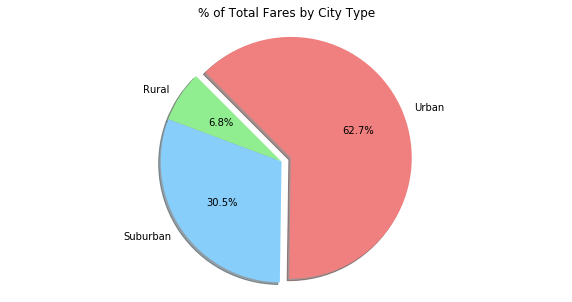

In [113]:
# Calculate Type Percents
pie_chart = scatter.groupby("type").sum()
labels = list(pie_chart.index)
explode = [0,0,0.1]
colors = ["lightgreen", "lightskyblue", "lightcoral"]

# Build Pie Chart
fig1, ax1 = plt.subplots(figsize=(10,5))

ax1.pie(pie_chart["Total Fare"], labels=labels, autopct="%1.1f%%",
       startangle = 135, explode = explode, colors = colors, shadow = True, 
       radius =1.2)
ax1.axis('equal')

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig('total_fare_city_type.png')

# Show Figure
plt.show()



## Total Rides by City Type

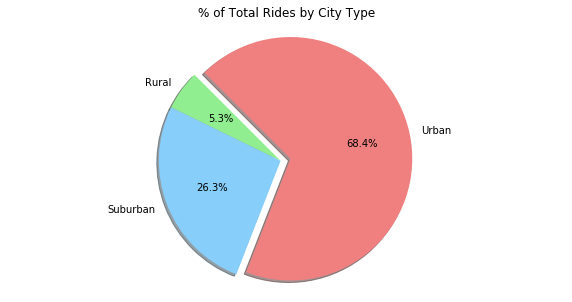

In [125]:
# Calculate Ride Percents
pie_chart = scatter.groupby("type").sum()
labels = list(pie_chart.index)
explode = [0,0,0.1]
colors = ["lightgreen", "lightskyblue", "lightcoral"]

# Build Pie Chart
fig1, ax1 = plt.subplots(figsize=(10,5))

ax1.pie(pie_chart_total_fares["Total Number of Rides"], labels=labels, autopct="%1.1f%%",
       startangle = 135, explode = explode, colors = colors, shadow = True, 
       radius =1.2)
ax1.axis('equal')

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig('total_rides_city_type.png')

# Show Figure
plt.show()

## Total Drivers by City Type

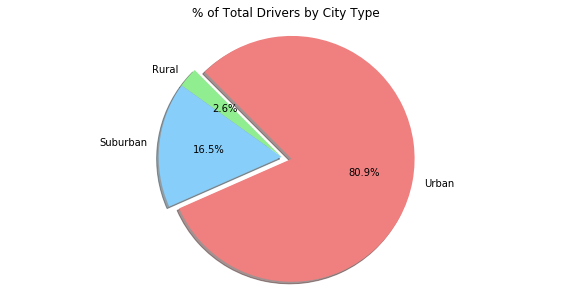

In [119]:
# Calculate Ride Percents
labels = list(pie_chart.index)
explode = [0,0,0.1]
colors = ["lightgreen", "lightskyblue", "lightcoral"]

# Build Pie Chart
fig1, ax1 = plt.subplots(figsize=(10,5))

ax1.pie(pie_chart["driver_count"], labels=labels, autopct="%1.1f%%",
       startangle = 135, explode = explode, colors = colors, shadow = True, 
       radius =1.2)
ax1.axis('equal')

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig('total_drivers_city_type.png')

# Show Figure
plt.show()